In [1]:
import pandas as pd
from google.colab import files
uploded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [6]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))   #normalise the dataset by lambda function  to bring all data in same range

In [7]:
diabetes.head()# prints some part of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
num_preg=tf.feature_column.numeric_column("Pregnancies") 
 # converts dataa into numeric form
plasma_gluc=tf.feature_column.numeric_column("Glucose")
dias_press = tf.feature_column.numeric_column("BloodPressure")
tricep = tf.feature_column.numeric_column("SkinThickness")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("DiabetesPedigreeFunction")
age = tf.feature_column.numeric_column("Age")

In [11]:
import matplotlib.pyplot as plt   

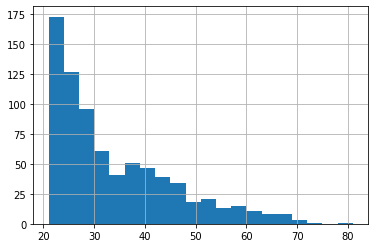

In [12]:
diabetes['Age'].hist(bins=20)  #plots a histogram

In [13]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80]) # categorised the age collumn


In [14]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [15]:
# TRAIN TEST SPLIT
x_data = diabetes.drop('Outcome',axis=1)
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [16]:
labels = diabetes['Outcome']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test,y_train,y_test =train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [19]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51


In [20]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47
748,0.176471,0.939698,0.573770,0.222222,0.236407,0.542474,0.140905,36
42,0.411765,0.532663,0.754098,0.181818,0.000000,0.338301,0.067037,48
485,0.000000,0.678392,0.557377,0.424242,0.295508,0.630402,0.122545,24
543,0.235294,0.422111,0.737705,0.232323,0.066194,0.588674,0.034586,25


In [21]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [22]:
model = tf.compat.v1.estimator.LinearClassifier(feature_columns = feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi5v591to', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpi5v591to/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 316.822
INFO:tensorflow:loss = 5.560179, step = 100 (0.322 sec)
INFO:tensorflow:global_step/sec: 434.96
INFO:tensorflow:loss = 4.7837276, step = 200 (0.229 sec)
INFO:tensorflow:global_step/sec: 382.71
INFO:tensorflow:loss = 5.421195, step = 300 (0.267 sec)
INFO:tensorflow:global_step/sec: 373.721
INFO:tensorflow:loss = 6.228103, step = 400 (0.266 sec)
INFO:tensorflow:global_step/sec: 378.304
INFO:tensorflow:loss

In [24]:
# EVAL THE MODEL-
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,y=y_test,batch_size=10,num_epochs =1,shuffle=False)

In [25]:
results=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-21T04:18:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi5v591to/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.62459s
INFO:tensorflow:Finished evaluation at 2022-02-21-04:18:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.79662555, auc_precision_recall = 0.6475146, average_loss = 0.5297293, global_step = 1000, label/mean = 0.35064936, loss = 5.0986447, precision = 0.6216216, prediction/mean = 0.37996015, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpi5v591to/model.ckpt-1000


In [26]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79662555,
 'auc_precision_recall': 0.6475146,
 'average_loss': 0.5297293,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0986447,
 'precision': 0.6216216,
 'prediction/mean': 0.37996015,
 'recall': 0.56790125}

In [27]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,batch_size=10,num_epochs=1,shuffle=False)

In [28]:
predictions=model.predict(pred_input_func)

In [29]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi5v591to/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5192486], dtype=float32),
  'logits': array([0.07703257], dtype=float32),
  'probabilities': array([0.48075137, 0.5192486 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6478894], dtype=float32),
  'logits': array([0.6097746], dtype=float32),
  'probabilities': array([0.35211062, 0.6478894 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4064386], dtype=float32),
  'logits': array([-0.3787079], dtype=float32),
  'probabilities': array([0.5935615 , 0.40643862], dtype=float32)},
 {

In [30]:
 my_pred[0:6]

[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5192486], dtype=float32),
  'logits': array([0.07703257], dtype=float32),
  'probabilities': array([0.48075137, 0.5192486 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6478894], dtype=float32),
  'logits': array([0.6097746], dtype=float32),
  'probabilities': array([0.35211062, 0.6478894 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4064386], dtype=float32),
  'logits': array([-0.3787079], dtype=float32),
  'probabilities': array([0.5935615 , 0.40643862], dtype=float32)},
 {

***DENSE NEURAL NETWORK TO PREDICT  THE RESULTS***


the above code was by using the linear classifier

In [31]:
  dnn_model=tf.compat.v1.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpy71ocp9o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpy71ocp9o/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.909457, step = 0
INFO:tensorflow:global_step/sec: 384.602
INFO:tensorflow:loss = 4.429465, step = 100 (0.269 sec)
INFO:tensorflow:global_step/sec: 439.3
INFO:tensorflow:loss = 4.3024654, step = 200 (0.229 sec)
INFO:tensorflow:global_step/sec: 361.339
INFO:tensorflow:loss = 4.133819, step = 300 (0.277 sec)
INFO:tensorflow:global_step/sec: 380.834
INFO:tensorflow:loss = 4.202557, step = 400 (0.2

# if you have a embbeded collumn that contain string group as GROUP ={ A,B,C,D}
then call the embeded group collumn  by
embeded_group_col =tf.feature_column.embedding_column(assigned_group=4)

and then refresh the feature collum   and then again train the model

In [33]:
# evalutation of the model
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x_test,y=y_test,batch_size=10,num_epochs= 1,shuffle=False)

In [34]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-21T04:37:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpy71ocp9o/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.97916s
INFO:tensorflow:Finished evaluation at 2022-02-21-04:37:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7748918, accuracy_baseline = 0.64935064, auc = 0.8389712, auc_precision_recall = 0.6946831, average_loss = 0.47112814, global_step = 1000, label/mean = 0.35064936, loss = 4.5346084, precision = 0.6933333, prediction/mean = 0.34480038, recall = 0.6419753
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpy71ocp9o/model.ckpt-1000


{'accuracy': 0.7748918,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8389712,
 'auc_precision_recall': 0.6946831,
 'average_loss': 0.47112814,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.5346084,
 'precision': 0.6933333,
 'prediction/mean': 0.34480038,
 'recall': 0.6419753}